## 04. 자동미분

In [1]:
import torch


### 4-1. requires_grad

In [21]:
# 아직 x에 대해서 자동 미분을 할 준비가 안되어있음
x = torch.rand(3)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([0.2959, 0.4346, 0.2048])
None
None
False


In [27]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.requires_grad) # 일단 True로 바뀜

tensor([1., 1., 1.], requires_grad=True)
True


In [28]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\USER\AppData\Local\Temp\ipykernel_944\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [29]:
z = y ** 2
print(z)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. Backward
x -> y -> z 계산을 역전파를 통해 기울기를 구함

In [30]:
result = z.sum() # 노드들 값 다 합쳐서 하나의 값 도출
result.backward() # 그 값에서 뒤로 돌아감

In [31]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


In [34]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)

with torch.no_grad():
    y = x ** 2
    print(x.requires_grad)
    print(y.requires_grad) # with 안에서는 다음단계로 넘어갈때 기울기 계산이 False가 됨

True
True
False


### 선형회귀 연습
1. 입출력 정의

2. 모델 정의

3. 손실함수 정의
- 손실함수 선택 : MSE, MAE

4. 가중치 업데이트
- 경사하강법 -> 어떤 것을 사용할지 선택

5. 학습 반복

6. 결과 시각화

Epoch [0], Loss:  589.6570
Epoch [100 / 500], Loss:  4.8952
Epoch [200 / 500], Loss:  4.7980
Epoch [300 / 500], Loss:  4.7621
Epoch [400 / 500], Loss:  4.7488
Epoch [500 / 500], Loss:  4.7439


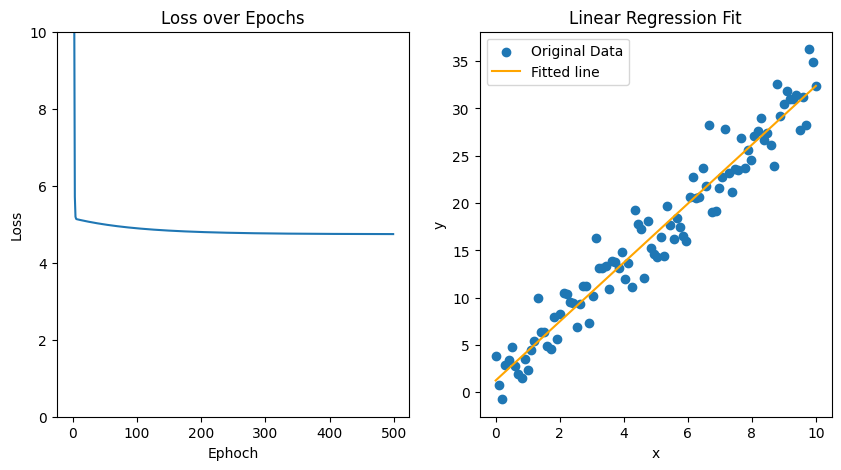

Model parameters
linear.weight: tensor([[3.1137]])
linear.bias: tensor([1.2553])


In [7]:
#1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2 # y 값 증가가 너무 일정하니 노이즈를 주어서 값에 변동을 줌

import torch.nn as nn # neural network
#2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel() # 모델 정의

#3. 손실함수 정의
# 손실함수 선택 : MSE, MAE
loss_function = nn.MSELoss() # 손실함수 정의

import torch.optim as optim
#4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
#lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01) # 사용할 모델 넣기

#5. 학습 반복
epochs = 500 # 반복횟수
losses = [] #각각의 루프마다 발생하는 손실을 저장

for epoch in range(epochs): # 반복횟수만큼 반복을 돌림
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 모델을 기반으로 결과값 도출
    loss = loss_function(outputs, y) # 결과값과 정답을 비교해 손실을 계산
    loss.backward() # 역전파로 가중치 구하기
    optimizer.step() # 가중치 업데이트 하기

    losses.append(loss.item()) # 손실값 저장


    if epoch == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

import matplotlib.pyplot as plt
#6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 10)
plt.title("Loss over Epochs")
plt.xlabel("Ephoch")
plt.ylabel("Loss")

#데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="orange", label="Fitted line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")